In [34]:
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics
from sklearn import ensemble, linear_model, svm, tree, neighbors, naive_bayes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:

income = pd.read_csv("/Users/beckhamsturgill/Desktop/Python/Datasets/income_evaluation.csv")
incomeX = income.drop(' income', axis=1)
incomey = income[' income']

In [36]:
incomeX

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [37]:
incomeX.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [38]:
incomey.to_frame()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
32556,<=50K
32557,>50K
32558,<=50K
32559,<=50K


In [39]:
incomey = (income[' income'] == ' <=50K') * 1

### Now we have changed <=50K to 1 and changed >50K to 0

In [40]:
incomey.value_counts()

1    24720
0     7841
Name:  income, dtype: int64

In [41]:
incomeX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [42]:
incomeX.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64

In [43]:
incomeX['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [44]:
incomeX[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

### this shows that the dataset missing values are placed with a ? so we need to find and alter these points

### We will check other columns for ? values to fix

In [45]:
incomeX[' fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name:  fnlwgt, Length: 21648, dtype: int64

In [46]:
incomeX[' education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

In [47]:
incomeX[' education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name:  education-num, dtype: int64

In [48]:
incomeX[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [49]:
incomeX[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [50]:
incomeX[' relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64

In [51]:
incomeX[' race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

In [52]:
incomeX[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

In [53]:
incomeX[' capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name:  capital-gain, Length: 119, dtype: int64

In [54]:
incomeX[' capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name:  capital-loss, Length: 92, dtype: int64

In [55]:
 incomeX[' hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name:  hours-per-week, Length: 94, dtype: int64

In [56]:
  incomeX[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [57]:
incomeX[' workclass'].replace(' ?', np.NaN, inplace=True)
incomeX[' occupation'].replace(' ?', np.NaN, inplace=True)
incomeX[' native-country'].replace(' ?', np.NaN, inplace=True)

In [58]:
incomeX.isnull().sum()

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
dtype: int64

### Now we can clearly see there are missing value counts in workclass, occupation, and native-country

In [59]:
for point in incomeX:
    incomeX[' workclass'].fillna(incomeX[' workclass'].mode()[0], inplace=True)
    incomeX[' occupation'].fillna(incomeX[' occupation'].mode()[0], inplace=True)
    incomeX[' native-country'].fillna(incomeX[' native-country'].mode()[0], inplace=True)    

### We filled these missing values with the mode of the respective columns

In [60]:
incomeX.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64

### Now we know that there is no missing data to skew the data

In [61]:
incomeX.corr().style.background_gradient()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [62]:
incomey.isnull().sum()

0

In [63]:
incomey.value_counts()

1    24720
0     7841
Name:  income, dtype: int64

### Now let's take a deeper dive into some charts and identify any patterns using the Seaborn library

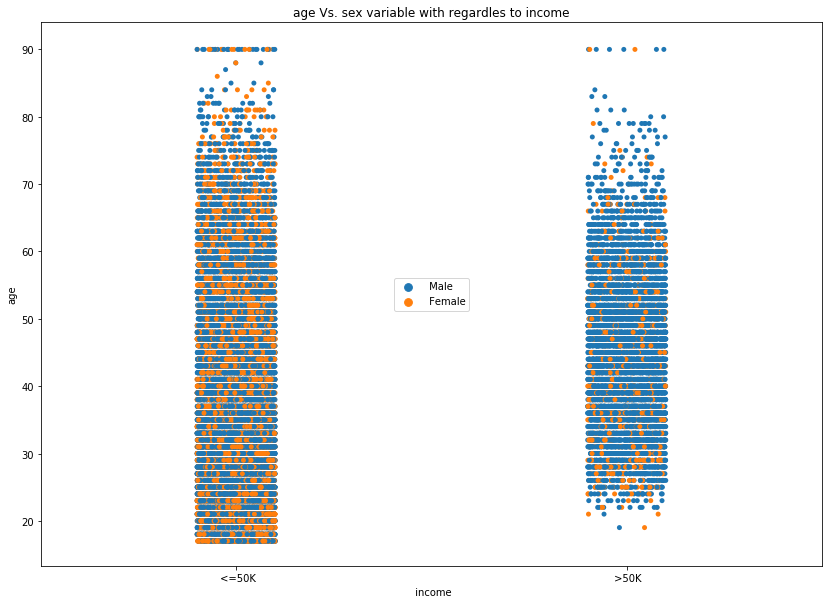

In [64]:
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.stripplot(x=" income", y="age",hue=' sex',data=income)
ax.set_title("age Vs. sex variable with regardles to income")
ax.legend(loc='center')
plt.show()

### The graph above demonstrates that Males earn more than Females

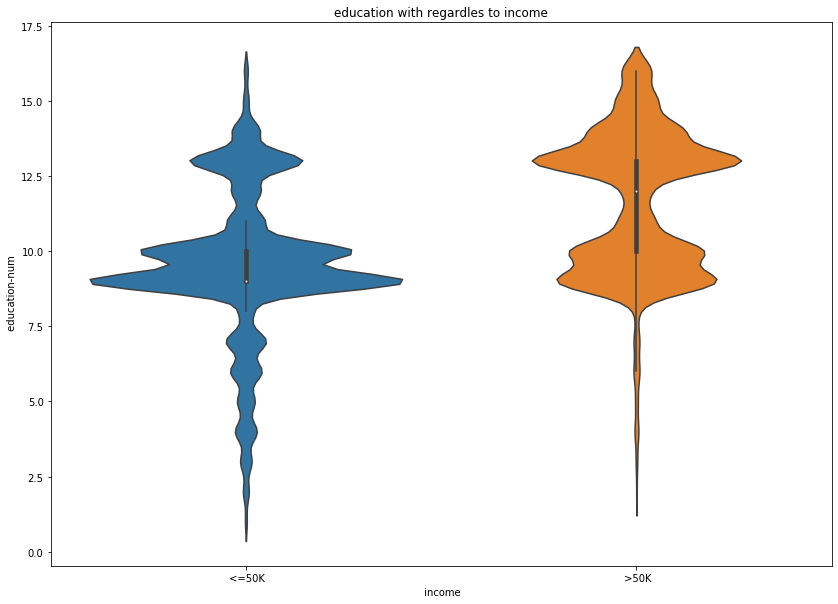

In [65]:
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.violinplot(x=" income", y=" education-num",data=income)
ax.set_title("education with regardles to income")
plt.show()

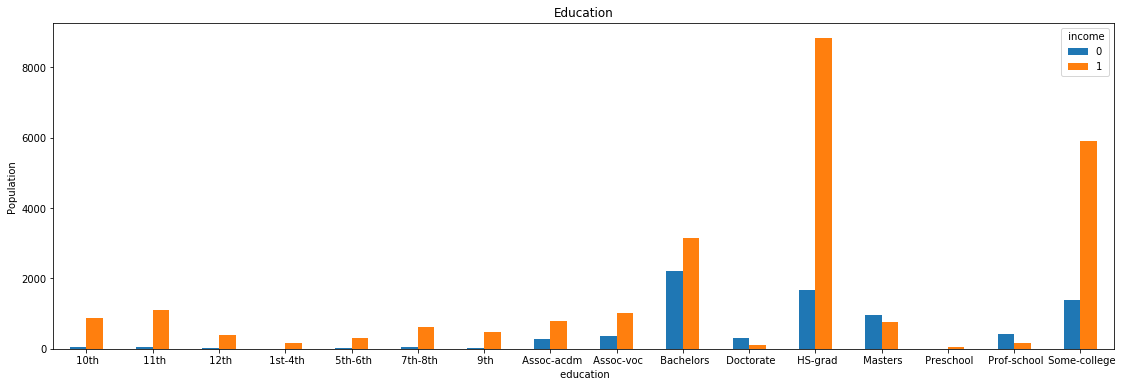

In [145]:
pd.crosstab(incomeX[' education'],incomey).plot(kind='bar',figsize=(19,6))
plt.title('Education')
plt.xticks(rotation=0)
plt.ylabel('Population')
plt.show()

### Remember, 0 is income >50K and 1 is income <=50K

### Clearly, there is a positive relationship between education and income

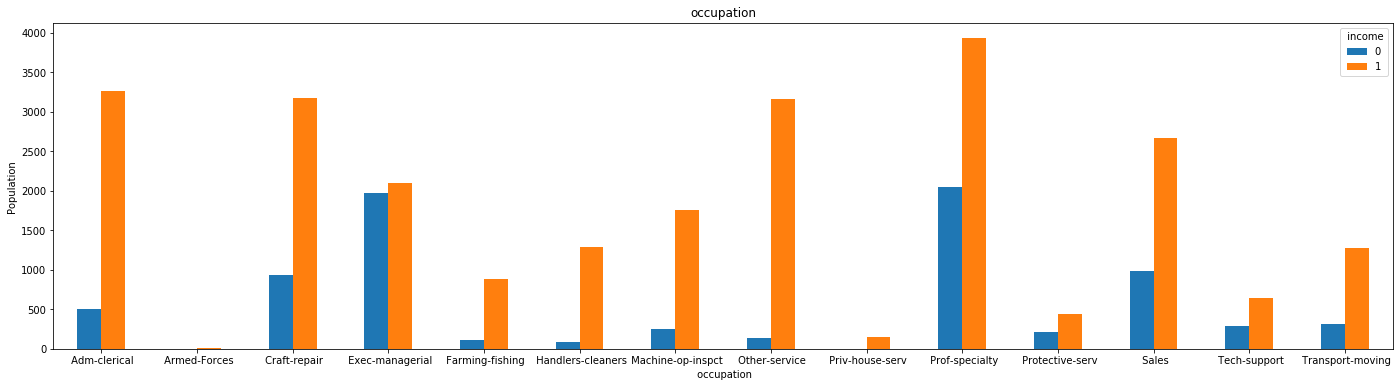

In [67]:
pd.crosstab(incomeX[' occupation'],incomey).plot(kind='bar',figsize=(24,6))
plt.title('occupation')
plt.xticks(rotation=0)
plt.ylabel('Population')
plt.show()

### Remember, 0 is income >50K and 1 is income <=50K

### Note: the majority of >50K income is in occupations like Exec-managerial and Prof-Specialty

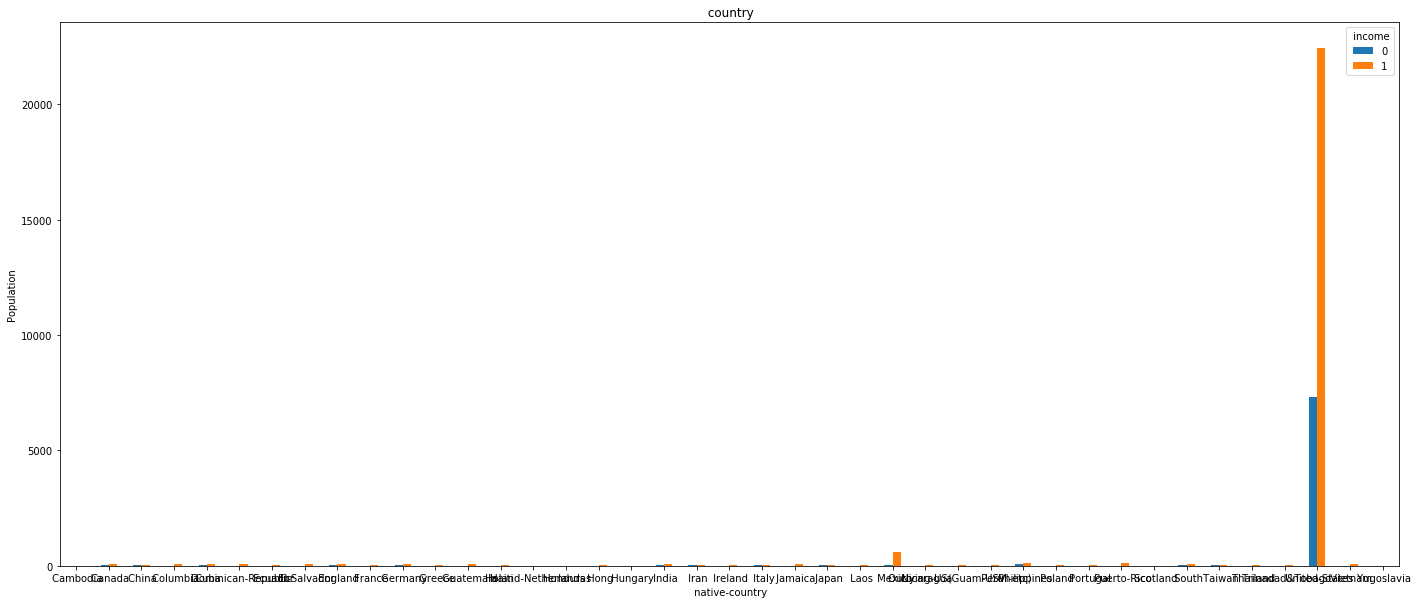

In [68]:
pd.crosstab(incomeX[' native-country'],incomey).plot(kind='bar',figsize=(24,10))
plt.title(' country')
plt.xticks(rotation=0)
plt.ylabel('Population')
plt.show()

### This graph above demonstrates that the native country isn't a very good indicator of income because the majority of people in this dataset is from the United States

### The Function below is for one hot encoding for out categorical variables

In [69]:
def make_dummies(dataset, list_of_variable_names):
    for i in list_of_variable_names:
        dataset = pd.concat([dataset, pd.get_dummies(dataset[i], prefix=i).iloc[:,0:-1]], axis=1)
        dataset = dataset.drop(i, axis=1)
    return dataset

In [70]:
incomeX1=make_dummies(incomeX, [' workclass', ' education', ' marital-status', ' occupation',' relationship',' race',' sex',' native-country'])


In [71]:
incomeX1.shape

(32561, 97)

In [72]:
trainX, testX, trainy, testy = model_selection.train_test_split(incomeX1, incomey, test_size = 0.3, random_state=53)

In [73]:
trainX.shape

(22792, 97)

In [74]:
testX.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam
3161,21,275726,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
29620,37,314963,10,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
31002,19,301911,10,0,0,35,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28845,31,272856,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3391,20,368852,10,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


### Function below calculates metrics for all the modeling we do later

In [75]:
def calculate_four_metrics (confusion_matrix):
    Sensitivity = confusion_matrix.iloc[1,1] / confusion_matrix.iloc[1].sum() 
    Specificity = confusion_matrix.iloc[0,0] / confusion_matrix.iloc[0].sum()
    Precision = confusion_matrix.iloc[1,1] / confusion_matrix.iloc[:,1].sum()
    Accuracy =  np.diag(confusion_matrix).sum() / confusion_matrix.sum().sum()
    return(Sensitivity, Specificity, Precision, Accuracy) 

### Logistic Regression:

In [76]:
trainX1 = sm.add_constant(trainX)
testX1 = sm.add_constant(testX)

In [77]:
trainX1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22792 entries, 3067 to 24089
Data columns (total 98 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   const                                        22792 non-null  float64
 1   age                                          22792 non-null  int64  
 2    fnlwgt                                      22792 non-null  int64  
 3    education-num                               22792 non-null  int64  
 4    capital-gain                                22792 non-null  int64  
 5    capital-loss                                22792 non-null  int64  
 6    hours-per-week                              22792 non-null  int64  
 7    workclass_ Federal-gov                      22792 non-null  uint8  
 8    workclass_ Local-gov                        22792 non-null  uint8  
 9    workclass_ Never-worked                     22792 non-null  uint8  


In [78]:
model = sm.OLS(trainy,trainX1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:44:22   Log-Likelihood:                -7691.6
No. Observations:               22792   AIC:                         1.558e+04
Df Residuals:                   22695   BIC:                         1.636e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

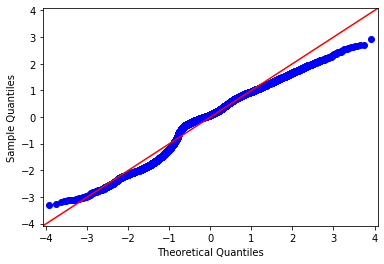

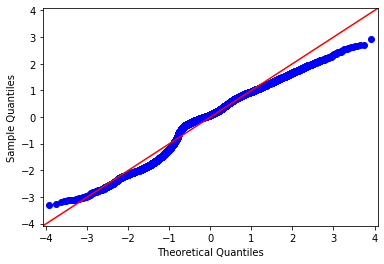

In [79]:
res = results.resid
sm.qqplot(res, fit=True, line='45')

In [80]:
predicted_y = results.predict(testX1)
((testy - predicted_y)**2).sum()

1152.8455096664666

### This model Shows...

### Lasso with penalized logistic regression

In [81]:
model_logit_lassoCV = linear_model.LogisticRegressionCV(cv=5, Cs=100, penalty='l1', solver='liblinear', random_state=23941).fit(trainX, trainy)
model_logit_lasso = linear_model.LogisticRegression(C=model_logit_lassoCV.C_[0], penalty='l1', solver='liblinear')

In [82]:
model_logit_lassoCV.C_[0]

0.20565123083486536

In [83]:
model_logit_lasso = linear_model.LogisticRegression(C=model_logit_lassoCV.C_[0], penalty='l1', solver='liblinear')

In [84]:
model_logit_lasso.fit(trainX, trainy)


LogisticRegression(C=0.20565123083486536, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
confusion_matrix_Lasso = pd.crosstab(testy, model_logit_lasso.predict(testX))
Sensitivity_Lasso, Specificity_Lasso, Precision_Lasso, Accuracy_Lasso = calculate_four_metrics(confusion_matrix_Lasso)
print("Sensitivity: ", Sensitivity_Lasso)
print("Specificity: ", Specificity_Lasso)
print("Precision: ", Precision_Lasso)
print("Accuracy: ", Accuracy_Lasso)

Sensitivity:  0.9314827352742044
Specificity:  0.5834731543624161
Precision:  0.8738567073170732
Accuracy:  0.8465554304432388


### Decision tree (min samples)

In [86]:
min_samples = range(10,20)
results = np.array([])
for min_sample in min_samples:
    model_tree = tree.DecisionTreeClassifier(min_samples_leaf=min_sample, random_state=53)
    results = np.append(results, 
                        np.mean(model_selection.cross_val_score(model_tree, trainX, trainy, scoring='recall')))

In [87]:
results

array([0.90845111, 0.9141621 , 0.91479665, 0.9194116 , 0.91658494,
       0.92033458, 0.91889241, 0.91848861, 0.91964234, 0.92085376])

In [88]:
min_samples[np.argmax(results)]

19

In [89]:
model_treeMIN = tree.DecisionTreeClassifier(min_samples_leaf=min_samples[np.argmax(results)])
model_treeMIN.fit(trainX, trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
confusion_matrix_TreeMIN = pd.crosstab(testy, model_treeMIN.predict(testX))
Sensitivity_TreeMIN, Specificity_TreeMIN, Precision_TreeMIN, Accuracy_TreeMIN = calculate_four_metrics(confusion_matrix_TreeMIN)
print("Sensitivity: ", Sensitivity_TreeMIN)
print("Specificity: ", Specificity_TreeMIN)
print("Precision: ", Precision_TreeMIN)
print("Accuracy: ", Accuracy_TreeMIN)

Sensitivity:  0.9259309410968178
Specificity:  0.6048657718120806
Precision:  0.8789203084832905
Accuracy:  0.8475790766711024


### Decision Tree (Max Depths)

In [91]:
max_depths = range(10,20)
results = np.array([])
for max_depth in max_depths:
    model_tree = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=53)
    results = np.append(results, 
                        np.mean(model_selection.cross_val_score(model_tree, trainX, trainy, scoring='recall')))

In [92]:
results

array([0.94450534, 0.93048745, 0.92708393, 0.92154601, 0.91658494,
       0.90625901, 0.89806749, 0.89483703, 0.88906836, 0.88987597])

In [93]:
max_depths[np.argmax(results)]

10

In [94]:
model_treeMAX = tree.DecisionTreeClassifier(max_depth=max_depths[np.argmax(results)])
model_treeMAX.fit(trainX, trainy)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(398.57689144736844, 622.669090909091, 'X[30] <= 0.5\ngini = 0.364\nsamples = 22792\nvalue = [5457, 17335]'),
 Text(237.67006578947368, 563.3672727272727, 'X[3] <= 7073.5\ngini = 0.122\nsamples = 12360\nvalue = [805, 11555]'),
 Text(160.11907894736842, 504.0654545454546, 'X[2] <= 12.5\ngini = 0.092\nsamples = 12130\nvalue = [585, 11545]'),
 Text(105.35921052631579, 444.7636363636364, 'X[4] <= 2218.5\ngini = 0.047\nsamples = 9763\nvalue = [237, 9526]'),
 Text(69.75, 385.4618181818182, 'X[5] <= 40.5\ngini = 0.043\nsamples = 9719\nvalue = [216, 9503]'),
 Text(43.80789473684211, 326.16, 'X[29] <= 0.5\ngini = 0.027\nsamples = 8016\nvalue = [109, 7907]'),
 Text(30.83684210526316, 266.85818181818183, 'X[0] <= 33.5\ngini = 0.026\nsamples = 8005\nvalue = [105, 7900]'),
 Text(15.663157894736843, 207.55636363636364, 'X[0] <= 28.5\ngini = 0.006\nsamples = 4697\nvalue = [14, 4683]'),
 Text(7.831578947368421, 148.2545454545455, 'X[69] <= 0.5\ngini = 0.002\nsamples = 3828\nvalue = [4, 3824]'),
 

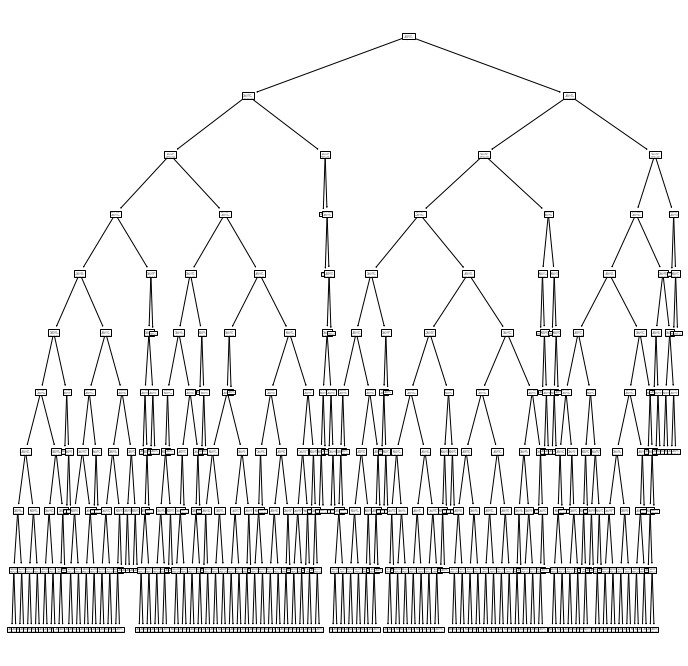

In [95]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model_treeMAX) 

In [96]:
confusion_matrix_TreeMAX = pd.crosstab(testy, model_treeMAX.predict(testX))
Sensitivity_TreeMAX, Specificity_TreeMAX, Precision_TreeMAX, Accuracy_TreeMAX = calculate_four_metrics(confusion_matrix_TreeMAX)
print("Sensitivity: ", Sensitivity_TreeMAX)
print("Specificity: ", Specificity_TreeMAX)
print("Precision: ", Precision_TreeMAX)
print("Accuracy: ", Accuracy_TreeMAX)

Sensitivity:  0.9417738659444821
Specificity:  0.5721476510067114
Precision:  0.8721003134796238
Accuracy:  0.8515712969597707


### Random Forest

In [97]:
max_depths = range(10, 30)
results = np.array([])
for max_depth in max_depths:
    rf = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=43)
    results = np.append(results, 
                        np.mean(model_selection.cross_val_score(rf, trainX, trainy, scoring='recall')))

In [98]:
results

array([0.95754254, 0.95736948, 0.95661956, 0.95419671, 0.95488895,
       0.9542544 , 0.95321604, 0.95275454, 0.95113931, 0.95148543,
       0.94923565, 0.9486011 , 0.94935102, 0.94652437, 0.94537064,
       0.94346697, 0.94427459, 0.94231324, 0.94202481, 0.9411595 ])

In [99]:
min_leaves = range(2,20)
results1 = np.array([])
for min_leaf in min_leaves:
    rf = ensemble.RandomForestClassifier(min_samples_leaf=min_leaf, n_estimators=100, random_state=43)
    results1 = np.append(results1, 
                        np.mean(model_selection.cross_val_score(rf, trainX, trainy, scoring='recall')))

In [163]:
results1

array([0.94715893, 0.94796654, 0.94871647, 0.94912028, 0.94992789,
       0.94837035, 0.94969714, 0.94929334, 0.94998558, 0.95044707,
       0.95090857, 0.95183155, 0.9525238 , 0.95333141, 0.95200461,
       0.95177387, 0.95269686, 0.95240842])

### Max depths better results than min leaves for Random Forest

In [100]:
rf = ensemble.RandomForestClassifier(max_depth=max_depths[np.argmax(results)], n_estimators=100, random_state=43)
rf.fit(trainX, trainy)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [101]:
confusion_matrix_RF = pd.crosstab(testy, rf.predict(testX))
Sensitivity_RF, Specificity_RF, Precision_RF, Accuracy_RF = calculate_four_metrics(confusion_matrix_RF)
print("Sensitivity: ", Sensitivity_RF)
print("Specificity: ", Specificity_RF)
print("Precision: ", Precision_RF)
print("Accuracy: ", Accuracy_RF)

Sensitivity:  0.9577522004062289
Specificity:  0.5276845637583892
Precision:  0.862666178802293
Accuracy:  0.8527996724332071


### Oversampling

In [102]:
incomey.value_counts()

1    24720
0     7841
Name:  income, dtype: int64

In [103]:
incomey.value_counts()/incomey.value_counts().sum()

1    0.75919
0    0.24081
Name:  income, dtype: float64

### Make the ratio of 1 to 0  6:4 using oversampling

In [104]:
trainy.value_counts()

1    17335
0     5457
Name:  income, dtype: int64

x = 17335 * 4 /6

In [105]:
int(trainy.value_counts()[1] * 4/6)

11556

In [106]:
oversampledX = trainX[trainy==0].sample(n = int(trainy.value_counts()[1] * 4/6), replace=True, random_state=53)

In [107]:
oversampledy = trainy[trainy==0].sample(n = int(trainy.value_counts()[1] * 4/6), replace=True, random_state=53)

In [108]:
oversampledX.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam
24683,45,201127,10,0,0,56,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8646,32,256362,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
16856,71,196610,4,6097,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
28266,64,47298,16,0,0,60,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
19486,47,205730,9,0,0,56,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [109]:
trainX1 = trainX[trainy==1].append(oversampledX)
trainy1 = trainy[trainy==1].append(oversampledy)

In [110]:
trainy1.value_counts()

1    17335
0    11556
Name:  income, dtype: int64

In [111]:
trainy1.value_counts()/trainy1.value_counts().sum()

1    0.600014
0    0.399986
Name:  income, dtype: float64

### Undersampling

In [112]:
trainy.value_counts()

1    17335
0     5457
Name:  income, dtype: int64

x= 5457 * 6 / 4

In [113]:
undersampledX = trainX[trainy==1].sample(n = int(trainy.value_counts()[0] * 6/4), replace=False, random_state=53)
undersampledy = trainy[trainy==1].sample(n = int(trainy.value_counts()[0] * 6/4), replace=False, random_state=53)

In [114]:
trainX2 = trainX[trainy==0].append(undersampledX)
trainy2 = trainy[trainy==0].append(undersampledy)

In [115]:
trainy2.value_counts()

1    8185
0    5457
Name:  income, dtype: int64

In [116]:
trainy2.value_counts()/trainy2.value_counts().sum()

1    0.599985
0    0.400015
Name:  income, dtype: float64

### Now that we have completed the Oversampling and undersampling, we can do the same modeling with the new training sets to see if we get better results

### Logistic Regression with Oversampled data

In [117]:
trainXX = sm.add_constant(trainX1)
testXX = sm.add_constant(testX)

In [118]:
model = sm.OLS(trainy1,trainXX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:56:24   Log-Likelihood:                -12107.
No. Observations:               28891   AIC:                         2.441e+04
Df Residuals:                   28794   BIC:                         2.521e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

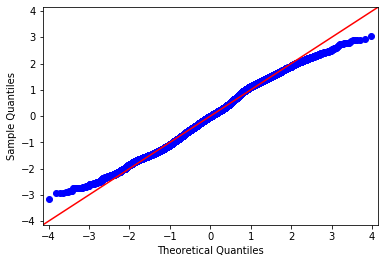

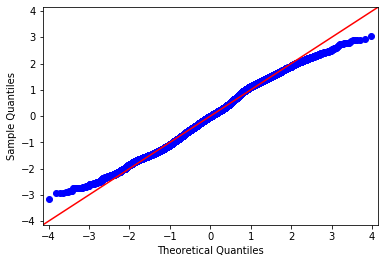

In [119]:
res = results.resid
sm.qqplot(res, fit=True, line='45')

In [120]:
predicted_y = results.predict(testXX)
((testy - predicted_y)**2).sum()

1270.9349557486858

### Lasso with penalized logistic regression with Oversampled data

In [121]:
model_logit_lassoCV = linear_model.LogisticRegressionCV(cv=5, Cs=100, penalty='l1', solver='liblinear', random_state=23941).fit(trainX1, trainy1)
model_logit_lasso = linear_model.LogisticRegression(C=model_logit_lassoCV.C_[0], penalty='l1', solver='liblinear')

In [122]:
model_logit_lasso = linear_model.LogisticRegression(C=model_logit_lassoCV.C_[0], penalty='l1', solver='liblinear')

In [123]:
model_logit_lasso.fit(trainX1, trainy1)

LogisticRegression(C=5.857020818056673, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
confusion_matrix_Lasso_Oversample = pd.crosstab(testy, model_logit_lasso.predict(testX))
Sensitivity_Lasso_Oversample, Specificity_Lasso_Oversample, Precision_Lasso_Oversample, Accuracy_Lasso_Oversample = calculate_four_metrics(confusion_matrix_Lasso_Oversample)
print("Sensitivity: ", Sensitivity_Lasso_Oversample)
print("Specificity: ", Specificity_Lasso_Oversample)
print("Precision: ", Precision_Lasso_Oversample)
print("Accuracy: ", Accuracy_Lasso_Oversample)

Sensitivity:  0.8532159783344617
Specificity:  0.7609060402684564
Precision:  0.9170426429922864
Accuracy:  0.8306889139113522


### Decision Tree model (Min Samples) with oversampled training 

In [125]:
min_samples = range(10,20)
results = np.array([])
for min_sample in min_samples:
    model_tree = tree.DecisionTreeClassifier(min_samples_leaf=min_sample, random_state=53)
    results = np.append(results, 
                        np.mean(model_selection.cross_val_score(model_tree, trainX1, trainy1, scoring='recall')))

In [126]:
results

array([0.85428324, 0.85549466, 0.8557831 , 0.85676377, 0.85474474,
       0.85797519, 0.85964811, 0.85959042, 0.85895587, 0.85699452])

In [127]:
min_samples[np.argmax(results)]

16

In [128]:
model_treeMIN = tree.DecisionTreeClassifier(min_samples_leaf=min_samples[np.argmax(results)])
model_treeMIN.fit(trainX1, trainy1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
confusion_matrix_TreeMIN_Oversample = pd.crosstab(testy, model_treeMIN.predict(testX))
Sensitivity_TreeMIN_Oversample, Specificity_TreeMIN_Oversample, Precision_TreeMIN_Oversample, Accuracy_TreeMIN_Oversample = calculate_four_metrics(confusion_matrix_TreeMIN_Oversample)
print("Sensitivity: ", Sensitivity_TreeMIN_Oversample)
print("Specificity: ", Specificity_TreeMIN_Oversample)
print("Precision: ", Precision_TreeMIN_Oversample)
print("Accuracy: ", Accuracy_TreeMIN_Oversample)

Sensitivity:  0.854840893703453
Specificity:  0.7344798657718121
Precision:  0.9088684134753815
Accuracy:  0.8254683181492476


### Decision Tree (Max Depth) using oversampled training data

In [130]:
max_depths = range(10,20)
results = np.array([])
for max_depth in max_depths:
    model_tree = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=53)
    results = np.append(results, 
                        np.mean(model_selection.cross_val_score(model_tree, trainX1, trainy1, scoring='recall')))

In [131]:
results

array([0.82855495, 0.84066917, 0.83893856, 0.84366888, 0.83847707,
       0.85947505, 0.85457168, 0.8544563 , 0.85116816, 0.85370637])

In [132]:
model_treeMAX = tree.DecisionTreeClassifier(max_depth=max_depths[np.argmax(results)])
model_treeMAX.fit(trainX1, trainy1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(389.6169806235888, 631.9350000000001, 'X[30] <= 0.5\ngini = 0.48\nsamples = 28891\nvalue = [11556, 17335]'),
 Text(217.63824244229804, 591.1650000000001, 'X[3] <= 7073.5\ngini = 0.226\nsamples = 13283\nvalue = [1728, 11555]'),
 Text(141.63353455845458, 550.395, 'X[2] <= 12.5\ngini = 0.171\nsamples = 12750\nvalue = [1205, 11545]'),
 Text(100.06898284621174, 509.625, 'X[4] <= 2218.5\ngini = 0.095\nsamples = 10029\nvalue = [503, 9526]'),
 Text(63.395768000501754, 468.855, 'X[5] <= 40.5\ngini = 0.088\nsamples = 9963\nvalue = [460, 9503]'),
 Text(33.59496675865529, 428.08500000000004, 'X[0] <= 33.5\ngini = 0.058\nsamples = 8152\nvalue = [245, 7907]'),
 Text(23.69155168088309, 387.31500000000005, 'X[29] <= 0.5\ngini = 0.015\nsamples = 4723\nvalue = [35, 4688]'),
 Text(18.489174611138985, 346.545, 'X[11] <= 0.5\ngini = 0.013\nsamples = 4714\nvalue = [31, 4683]'),
 Text(10.772227797290517, 305.77500000000003, 'X[0] <= 27.5\ngini = 0.01\nsamples = 4608\nvalue = [23, 4585]'),
 Text(3.35975

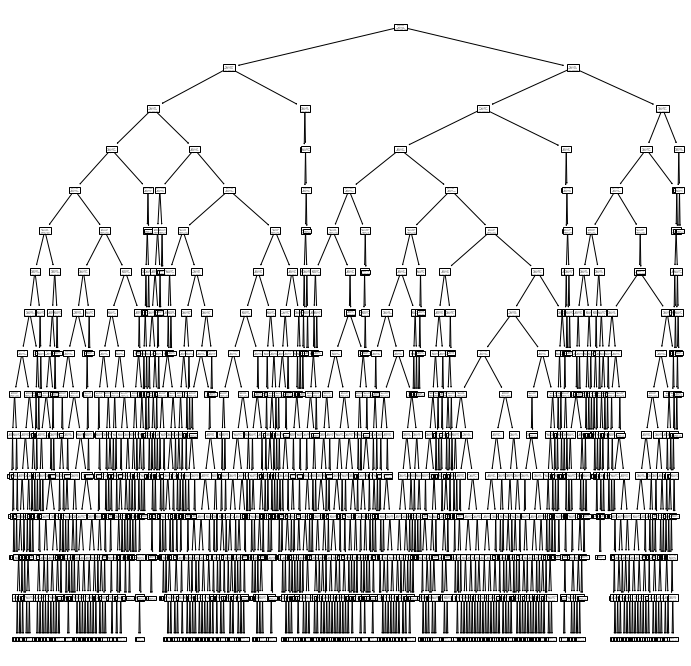

In [133]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model_treeMAX)

In [134]:
confusion_matrix_TreeMAX_Oversample = pd.crosstab(testy, model_treeMAX.predict(testX))
Sensitivity_TreeMAX_Oversample, Specificity_TreeMAX_Oversample, Precision_TreeMAX_Oversample, Accuracy_TreeMAX_Oversample = calculate_four_metrics(confusion_matrix_TreeMAX_Oversample)
print("Sensitivity: ", Sensitivity_TreeMAX_Oversample)
print("Specificity: ", Specificity_TreeMAX_Oversample)
print("Precision: ", Precision_TreeMAX_Oversample)
print("Accuracy: ", Accuracy_TreeMAX_Oversample)

Sensitivity:  0.8714962762356128
Specificity:  0.7197986577181208
Precision:  0.9059684684684685
Accuracy:  0.8344764049544477


### Random Forest with Oversampled training data

In [135]:
max_depths = range(10, 30)
results = np.array([])
for max_depth in max_depths:
    rf = ensemble.RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=43)
    results = np.append(results, 
                        np.mean(model_selection.cross_val_score(rf, trainX1, trainy1, scoring='recall')))

In [136]:
results

array([0.86241708, 0.86610903, 0.87124315, 0.87112778, 0.87164696,
       0.87545428, 0.87545428, 0.88099221, 0.8788578 , 0.88093453,
       0.88295356, 0.88312662, 0.88543409, 0.88704932, 0.88768388,
       0.89045284, 0.89224113, 0.89270262, 0.8954139 , 0.89604846])

In [137]:
min_leaves = range(2,20)
results1 = np.array([])
for min_leaf in min_leaves:
    rf = ensemble.RandomForestClassifier(min_samples_leaf=min_leaf, n_estimators=100, random_state=43)
    results1 = np.append(results1, 
                        np.mean(model_selection.cross_val_score(rf, trainX1, trainy1, scoring='recall')))

In [138]:
results1

array([0.88970291, 0.87995385, 0.87631958, 0.87274301, 0.87158927,
       0.87043554, 0.86824344, 0.86899337, 0.86691664, 0.86933949,
       0.86772426, 0.86582059, 0.86726276, 0.86714739, 0.86893568,
       0.86957023, 0.86772426, 0.86737814])

### Random Forest with Max depths is better than min samples

In [139]:
rf = ensemble.RandomForestClassifier(max_depth=max_depths[np.argmax(results)], n_estimators=100, random_state=43)
rf.fit(trainX1, trainy1)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=29, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [140]:
confusion_matrix_RF_Oversample = pd.crosstab(testy, rf.predict(testX))
Sensitivity_RF_Oversample, Specificity_RF_Oversample, Precision_RF_Oversample, Accuracy_RF_Oversample = calculate_four_metrics(confusion_matrix_RF_Oversample)
print("Sensitivity: ", Sensitivity_RF_Oversample)
print("Specificity: ", Specificity_RF_Oversample)
print("Precision: ", Precision_RF_Oversample)
print("Accuracy: ", Accuracy_RF_Oversample)

Sensitivity:  0.8991198375084631
Specificity:  0.6996644295302014
Precision:  0.9026644915715063
Accuracy:  0.8504452861091207


In [141]:
#

### Results without Oversampling

In [142]:
result_df1 = pd.DataFrame({'Sensitivity': [Sensitivity_Lasso, Sensitivity_TreeMIN, Sensitivity_TreeMAX, Sensitivity_RF],
                          'Specificity': [Specificity_Lasso, Specificity_TreeMIN, Specificity_TreeMAX, Specificity_RF],
                          'Precision': [Precision_Lasso, Precision_TreeMIN, Precision_TreeMAX, Precision_RF],
                          'Accuracy': [Accuracy_Lasso, Accuracy_TreeMIN, Accuracy_TreeMIN, Accuracy_RF]})
result_df1.index = ['Lasso', 'DT Min Samples', 'DT Max Depth', 'RandomForest']
result_df1.style.background_gradient()

,Sensitivity,Specificity,Precision,Accuracy
Lasso,0.931483,0.583473,0.873857,0.846555
DT Min Samples,0.925931,0.604866,0.878920,0.847579
DT Max Depth,0.941774,0.572148,0.872100,0.847579
RandomForest,0.957752,0.527685,0.862666,0.852800


### Results with Oversampling 

In [143]:
result_df2 = pd.DataFrame({'Sensitivity': [Sensitivity_Lasso_Oversample, Sensitivity_TreeMIN_Oversample, Sensitivity_TreeMAX_Oversample, Sensitivity_RF_Oversample],
                          'Specificity': [Specificity_Lasso_Oversample, Specificity_TreeMIN_Oversample, Specificity_TreeMAX_Oversample, Specificity_RF_Oversample],
                          'Precision': [Precision_Lasso_Oversample, Precision_TreeMIN_Oversample, Precision_TreeMAX_Oversample, Precision_RF_Oversample],
                          'Accuracy': [Accuracy_Lasso_Oversample, Accuracy_TreeMIN_Oversample, Accuracy_TreeMIN_Oversample, Accuracy_RF_Oversample]})
result_df2.index = ['Lasso w/ oversampling', 'DT Min Samples w/ oversampling', 'DT Max Depth w/ oversampling', 'RandomForest w/ oversampling']
result_df2.style.background_gradient()

,Sensitivity,Specificity,Precision,Accuracy
Lasso w/ oversampling,0.853216,0.760906,0.917043,0.830689
DT Min Samples w/ oversampling,0.854841,0.734480,0.908868,0.825468
DT Max Depth w/ oversampling,0.871496,0.719799,0.905968,0.825468
RandomForest w/ oversampling,0.899120,0.699664,0.902664,0.850445
